In [75]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
import pandas as pd

df = pd.read_csv('/content/datos_tratados.csv')
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   int64  
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   int64  
 11  OnlineBackup      7043 non-null   int64  
 12  DeviceProtection  7043 non-null   int64  
 13  TechSupport       7043 non-null   int64  
 14  StreamingTV       7043 non-null   int64  
 15  StreamingMovies   7043 non-null   int64  
 16  Contract          7043 non-null   object 


In [78]:
df.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [79]:
df.describe(include='O')

,customerID,gender,InternetService,Contract,PaymentMethod
count,7043,7043,7043,7043,7043
unique,7043,2,3,3,4
top,9995-HOTOH,Male,Fiber optic,Month-to-month,Electronic check
freq,1,3555,3096,3875,2365


In [80]:
df = df.drop(columns=['customerID'])

In [81]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [82]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['gender', 'Contract', 'PaymentMethod', 'InternetService']

one_hot = make_column_transformer(
    (OneHotEncoder(drop='if_binary', handle_unknown='ignore'), categorical_cols),
    remainder='passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False
)

In [83]:
X = one_hot.fit_transform(X)

In [84]:
feature_names = one_hot.get_feature_names_out()
X_encoded_df = pd.DataFrame(X, columns=feature_names)
X_encoded_df.head()

,onehotencoder__gender_Male,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,...,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Cuentas_Diarias
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.6,593.30,2.186667
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.9,542.40,1.996667
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.9,280.85,2.463333
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.0,1237.85,3.266667
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.9,267.40,2.796667


In [85]:
df_codificado = pd.concat([X_encoded_df, y], axis=1)
df_codificado.head()

,onehotencoder__gender_Male,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,...,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Cuentas_Diarias,Churn
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,65.6,593.30,2.186667,0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,59.9,542.40,1.996667,0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,73.9,280.85,2.463333,1
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,98.0,1237.85,3.266667,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,83.9,267.40,2.796667,1


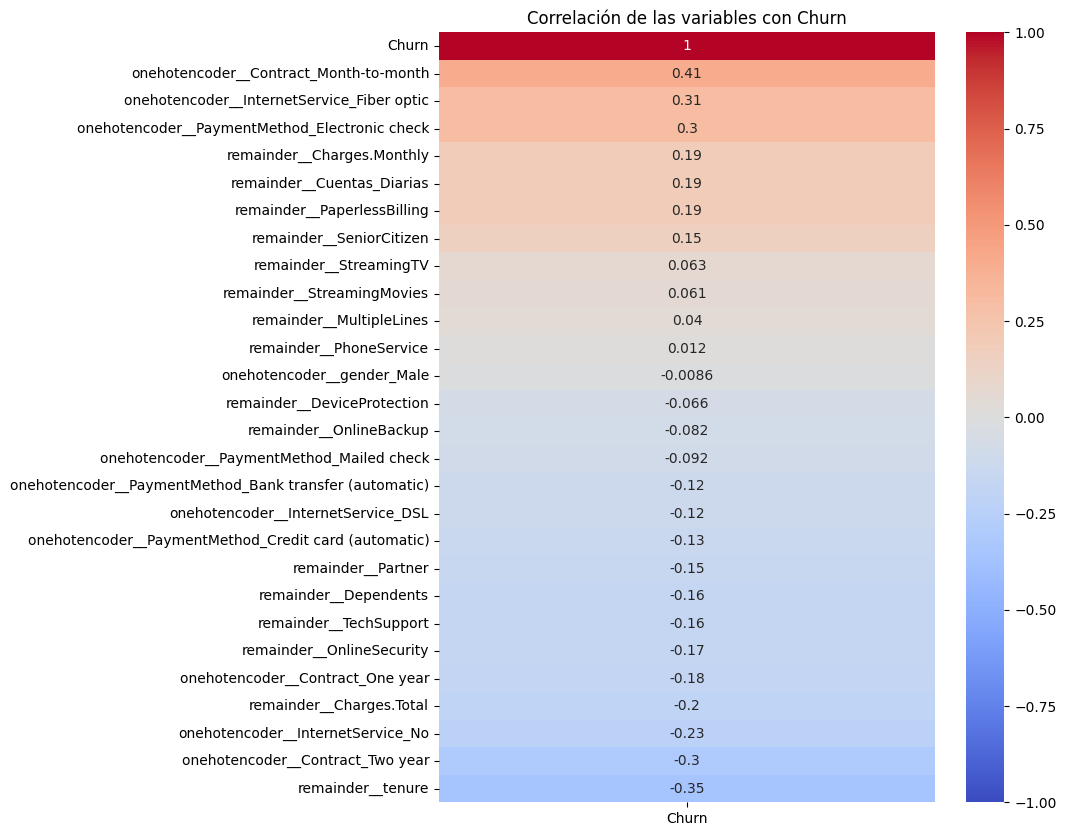

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Copia para no modificar el original
df_corr = df_codificado.copy()

# Calcular matriz de correlación
corr_matrix = df_corr.corr()

# Visualizar correlación con Churn
plt.figure(figsize=(8,10))
sns.heatmap(
    corr_matrix[['Churn']].sort_values(by='Churn', ascending=False),
    annot=True, cmap='coolwarm', vmin=-1, vmax=1
)
plt.title("Correlación de las variables con Churn")
plt.show()

In [87]:
# Se eliminan las variables no influyentes

df_final = df_codificado.drop(columns=['onehotencoder__gender_Male', 'remainder__PhoneService', 'remainder__MultipleLines', 'remainder__Charges.Total'])
df_final.head()

,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,...,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Charges.Monthly,remainder__Cuentas_Diarias,Churn
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.6,2.186667,0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.9,1.996667,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.9,2.463333,1
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.0,3.266667,1
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.9,2.796667,1


In [88]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   onehotencoder__Contract_Month-to-month                  7043 non-null   float64
 1   onehotencoder__Contract_One year                        7043 non-null   float64
 2   onehotencoder__Contract_Two year                        7043 non-null   float64
 3   onehotencoder__PaymentMethod_Bank transfer (automatic)  7043 non-null   float64
 4   onehotencoder__PaymentMethod_Credit card (automatic)    7043 non-null   float64
 5   onehotencoder__PaymentMethod_Electronic check           7043 non-null   float64
 6   onehotencoder__PaymentMethod_Mailed check               7043 non-null   float64
 7   onehotencoder__InternetService_DSL                      7043 non-null   float64
 8   onehotencoder__InternetService_Fiber o

Proporción de cancelación (%):
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


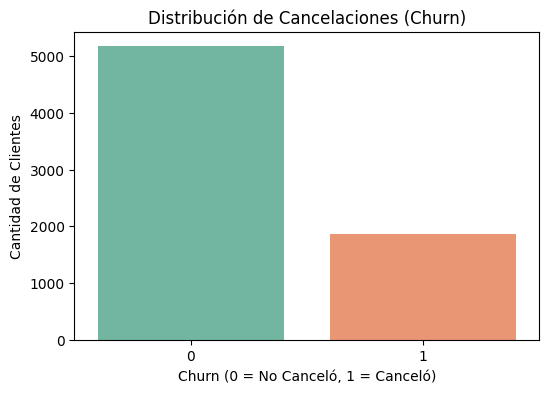

In [89]:
conteo = df_final['Churn'].value_counts(normalize=True) * 100

print("Proporción de cancelación (%):")
print(conteo)

# Visualización
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title("Distribución de Cancelaciones (Churn)")
plt.xlabel("Churn (0 = No Canceló, 1 = Canceló)")
plt.ylabel("Cantidad de Clientes")
plt.show()

Correlación con Churn:
Churn                                                     1.000000
onehotencoder__Contract_Month-to-month                    0.405103
onehotencoder__InternetService_Fiber optic                0.308020
onehotencoder__PaymentMethod_Electronic check             0.301919
remainder__Charges.Monthly                                0.193356
remainder__Cuentas_Diarias                                0.193356
remainder__PaperlessBilling                               0.191825
remainder__SeniorCitizen                                  0.150889
remainder__StreamingTV                                    0.063228
remainder__StreamingMovies                                0.061382
remainder__DeviceProtection                              -0.066160
remainder__OnlineBackup                                  -0.082255
onehotencoder__PaymentMethod_Mailed check                -0.091683
onehotencoder__PaymentMethod_Bank transfer (automatic)   -0.117937
onehotencoder__InternetService_DSL     

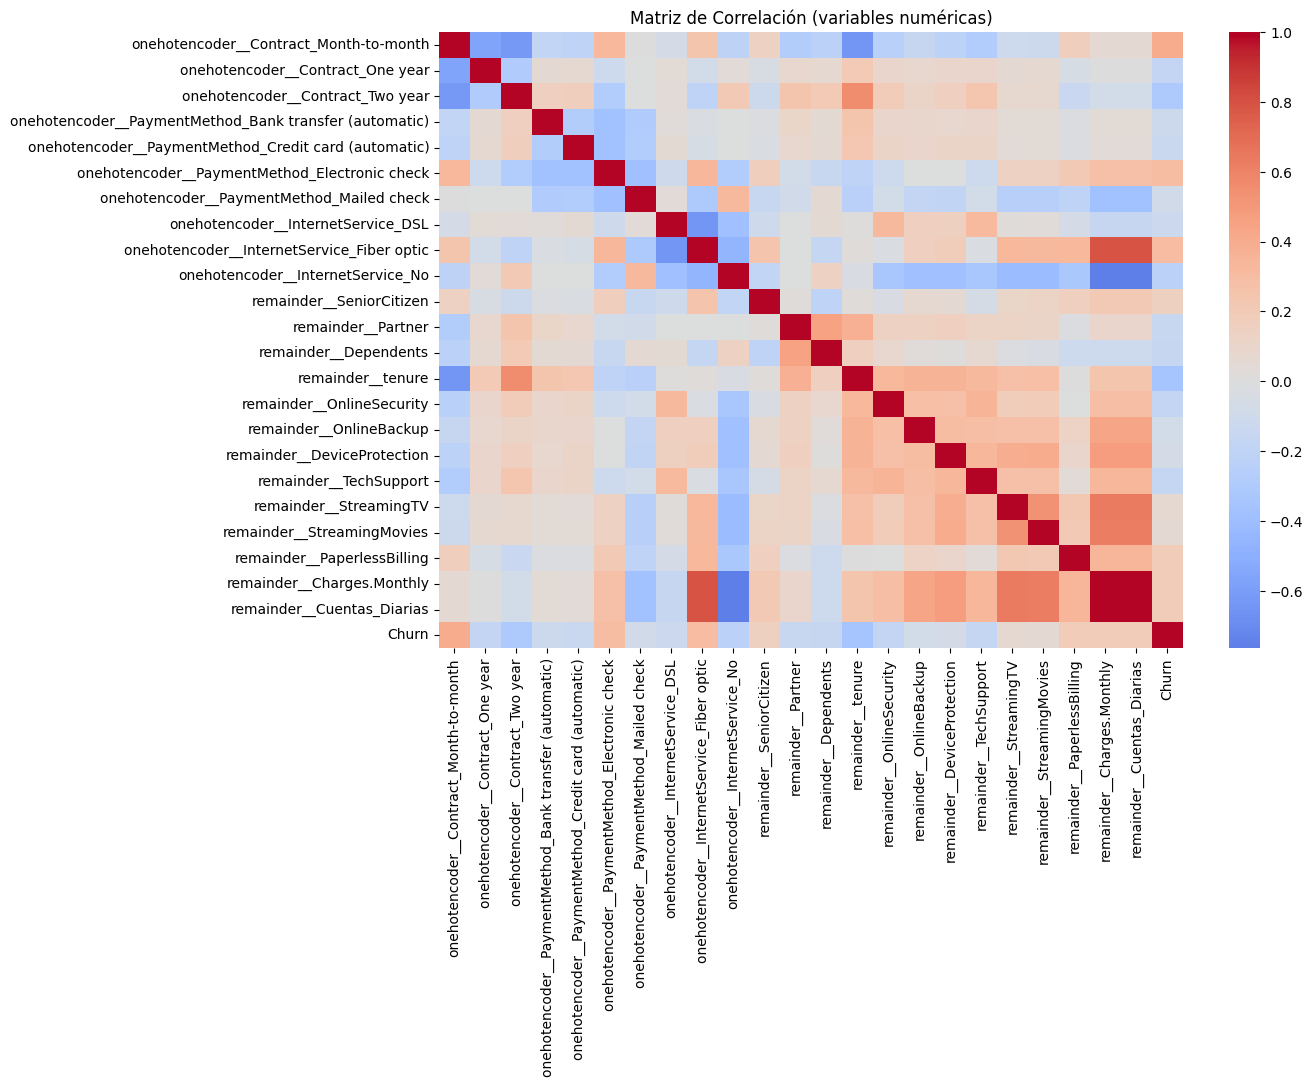

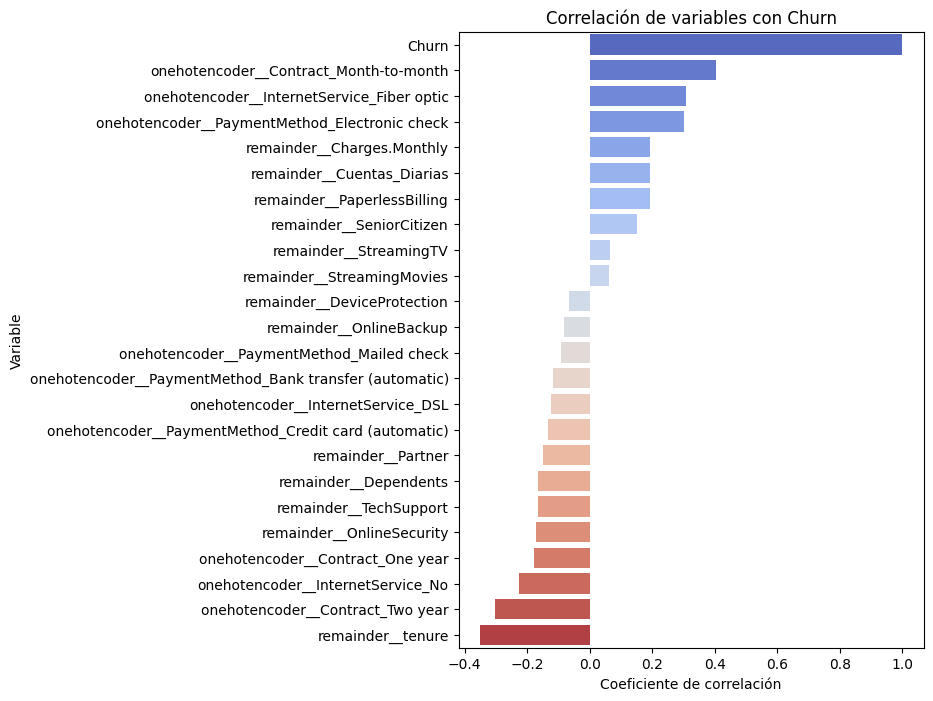

In [90]:
corr_matrix = df_final.corr()

# Filtramos solo la correlación con la variable objetivo 'Churn'
corr_with_churn = corr_matrix['Churn'].sort_values(ascending=False)

# Mostramos las correlaciones con Churn
print("Correlación con Churn:")
print(corr_with_churn)

# --- Visualización de TODA la matriz de correlación ---
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación (variables numéricas)')
plt.show()

# --- Visualización solo de correlaciones con Churn ---
plt.figure(figsize=(6, 8))
sns.barplot(x=corr_with_churn.values, y=corr_with_churn.index, palette='coolwarm')
plt.title('Correlación de variables con Churn')
plt.xlabel('Coeficiente de correlación')
plt.ylabel('Variable')
plt.show()

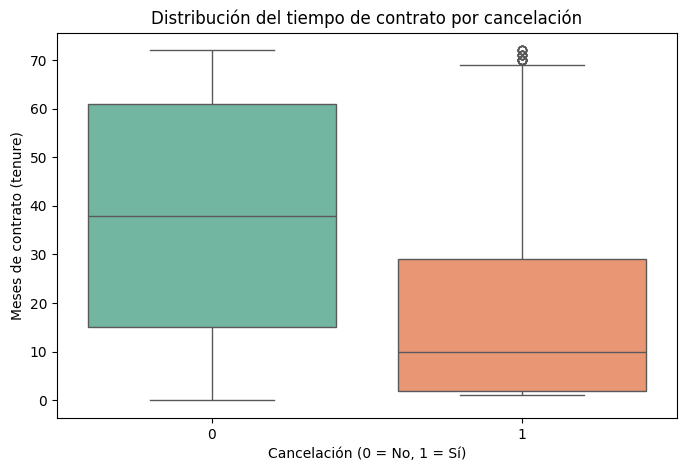

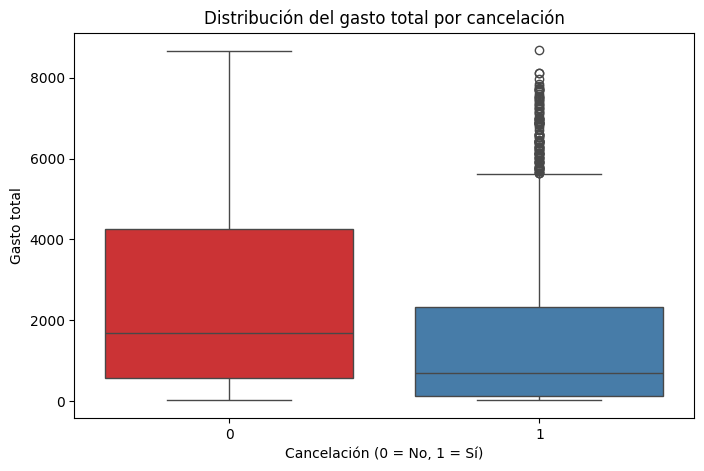

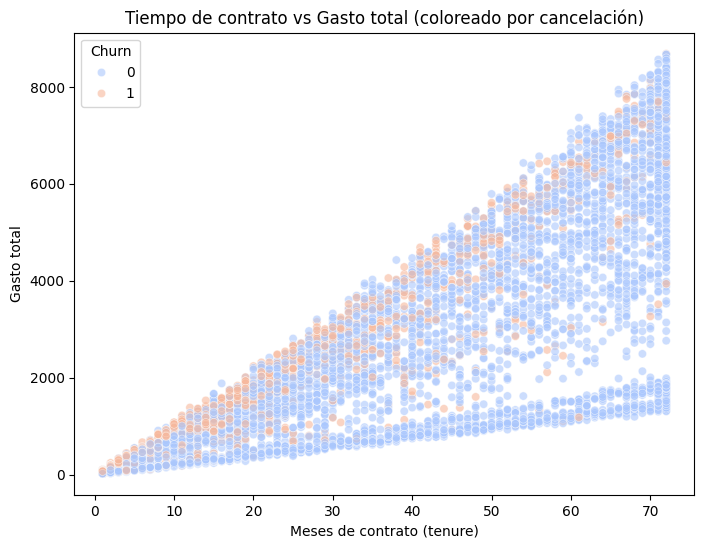

In [91]:
# --- Boxplot: Tiempo de contrato (tenure) vs Cancelación ---
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set2')
plt.title('Distribución del tiempo de contrato por cancelación')
plt.xlabel('Cancelación (0 = No, 1 = Sí)')
plt.ylabel('Meses de contrato (tenure)')
plt.show()

# --- Boxplot: Gasto total (Charges.Total) vs Cancelación ---
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Charges.Total', data=df, palette='Set1')
plt.title('Distribución del gasto total por cancelación')
plt.xlabel('Cancelación (0 = No, 1 = Sí)')
plt.ylabel('Gasto total')
plt.show()

# --- Scatter plot: Tiempo de contrato vs Gasto total, coloreado por cancelación ---
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='tenure', y='Charges.Total', hue='Churn',
    data=df, palette='coolwarm', alpha=0.6
)
plt.title('Tiempo de contrato vs Gasto total (coloreado por cancelación)')
plt.xlabel('Meses de contrato (tenure)')
plt.ylabel('Gasto total')
plt.show()

In [92]:
from sklearn.model_selection import train_test_split

# X = variables independientes (quitamos 'Churn')
X = df_final.drop('Churn', axis=1)

# y = variable objetivo
y = df_final['Churn']

# División 70% entrenamiento - 30% prueba, manteniendo proporción de clases
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)
print("Proporción Churn en entrenamiento:\n", y_train.value_counts(normalize=True))
print("Proporción Churn en prueba:\n", y_test.value_counts(normalize=True))


Tamaño de entrenamiento: (4930, 23)
Tamaño de prueba: (2113, 23)
Proporción Churn en entrenamiento:
 Churn
0    0.734686
1    0.265314
Name: proportion, dtype: float64
Proporción Churn en prueba:
 Churn
0    0.734501
1    0.265499
Name: proportion, dtype: float64


In [93]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   onehotencoder__Contract_Month-to-month                  7043 non-null   float64
 1   onehotencoder__Contract_One year                        7043 non-null   float64
 2   onehotencoder__Contract_Two year                        7043 non-null   float64
 3   onehotencoder__PaymentMethod_Bank transfer (automatic)  7043 non-null   float64
 4   onehotencoder__PaymentMethod_Credit card (automatic)    7043 non-null   float64
 5   onehotencoder__PaymentMethod_Electronic check           7043 non-null   float64
 6   onehotencoder__PaymentMethod_Mailed check               7043 non-null   float64
 7   onehotencoder__InternetService_DSL                      7043 non-null   float64
 8   onehotencoder__InternetService_Fiber o


📊 Resultados para Regresión Logística
Accuracy: 0.7965
Precisión: 0.6362
Recall: 0.5455
F1-score: 0.5873

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



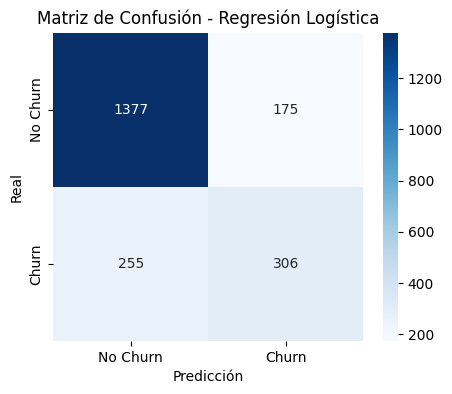


📊 Resultados para Random Forest
Accuracy: 0.7761
Precisión: 0.5961
Recall: 0.4866
F1-score: 0.5358

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1552
           1       0.60      0.49      0.54       561

    accuracy                           0.78      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.76      0.78      0.77      2113



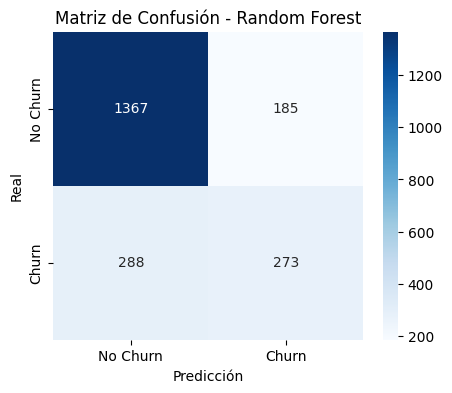

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

def evaluar_modelo(nombre, modelo, X_train, X_test, y_train, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n📊 Resultados para {nombre}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precisión: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.show()

# ----------------------------
# Modelo 1: Regresión Logística (con normalización)
# ----------------------------
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

# ----------------------------
# Modelo 2: Random Forest (sin normalización)
# ----------------------------
pipeline_rf = Pipeline([
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Evaluar ambos modelos
evaluar_modelo("Regresión Logística", pipeline_logreg, X_train, X_test, y_train, y_test)
evaluar_modelo("Random Forest", pipeline_rf, X_train, X_test, y_train, y_test)



Antes de SMOTE:
Churn
0    3622
1    1308
Name: count, dtype: int64

Después de SMOTE:
Churn
0    3622
1    3622
Name: count, dtype: int64

📊 Resultados para Regresión Logística SMOTE
Accuracy: 0.7487
Precisión: 0.5176
Recall: 0.7879
F1-score: 0.6247

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1552
           1       0.52      0.79      0.62       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113



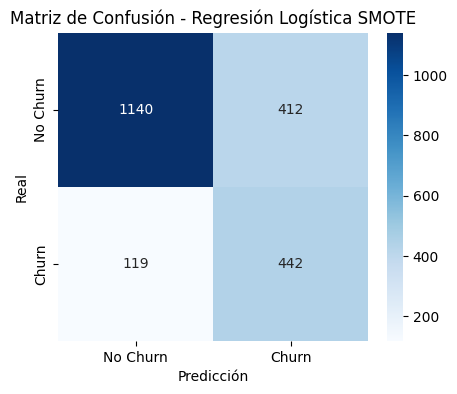


📊 Resultados para Random Forest SMOTE
Accuracy: 0.7686
Precisión: 0.5706
Recall: 0.5187
F1-score: 0.5434

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85      1552
           1       0.57      0.52      0.54       561

    accuracy                           0.77      2113
   macro avg       0.70      0.69      0.69      2113
weighted avg       0.76      0.77      0.76      2113



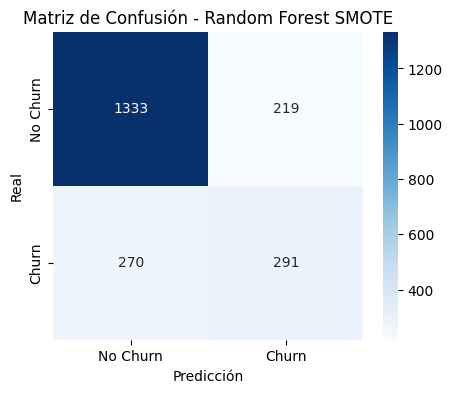

In [96]:
from imblearn.over_sampling import SMOTE

# 1. Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print(f"Antes de SMOTE:\n{y_train.value_counts()}")
print(f"\nDespués de SMOTE:\n{y_train_bal.value_counts()}")

# 3. Entrenar y evaluar usando la función existente
# Evaluar ambos modelos
evaluar_modelo("Regresión Logística SMOTE", pipeline_logreg, X_train_bal, X_test, y_train_bal, y_test)
evaluar_modelo("Random Forest SMOTE", pipeline_rf, X_train_bal, X_test, y_train_bal, y_test)

In [98]:
logreg_smote = LogisticRegression(max_iter=1000,random_state=42)
logreg_smote.fit(X_train_bal, y_train_bal)

y_pred_logreg = logreg_smote.predict(X_test)


rf_smote = RandomForestClassifier(n_estimators=200, random_state=42)
rf_smote.fit(X_train_bal, y_train_bal)

y_pred_rf = rf_smote.predict(X_test)

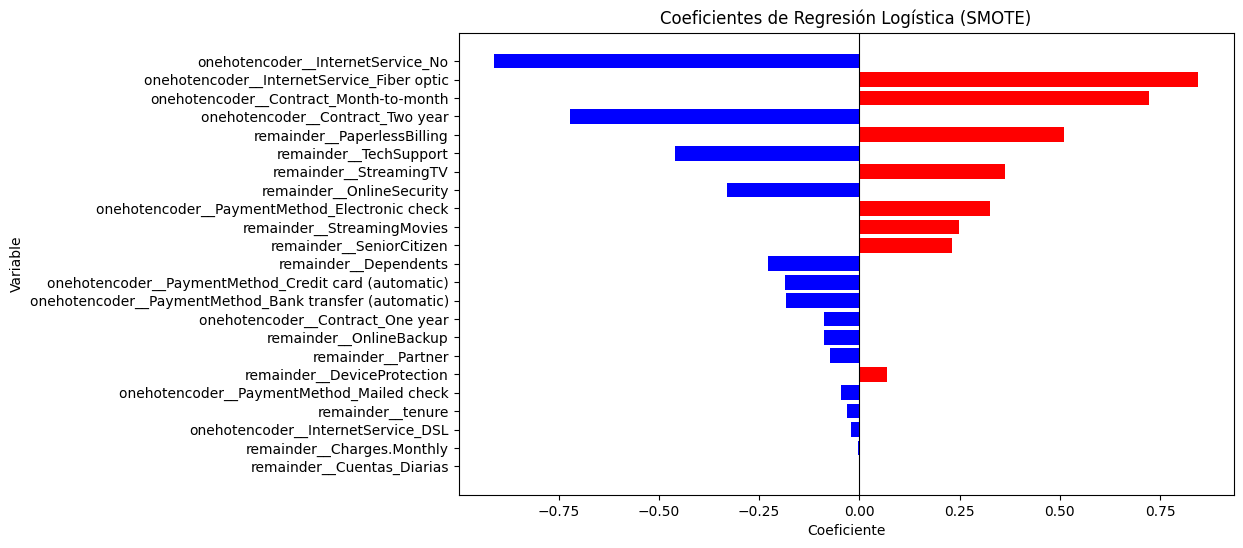

Top variables (Regresión Logística con SMOTE):
                                         Variable  Coeficiente   AbsCoef
9               onehotencoder__InternetService_No    -0.911567  0.911567
8      onehotencoder__InternetService_Fiber optic     0.845515  0.845515
0          onehotencoder__Contract_Month-to-month     0.723043  0.723043
2                onehotencoder__Contract_Two year    -0.721004  0.721004
20                    remainder__PaperlessBilling     0.509521  0.509521
17                         remainder__TechSupport    -0.459750  0.459750
18                         remainder__StreamingTV     0.362634  0.362634
14                      remainder__OnlineSecurity    -0.329303  0.329303
5   onehotencoder__PaymentMethod_Electronic check     0.325909  0.325909
19                     remainder__StreamingMovies     0.248593  0.248593


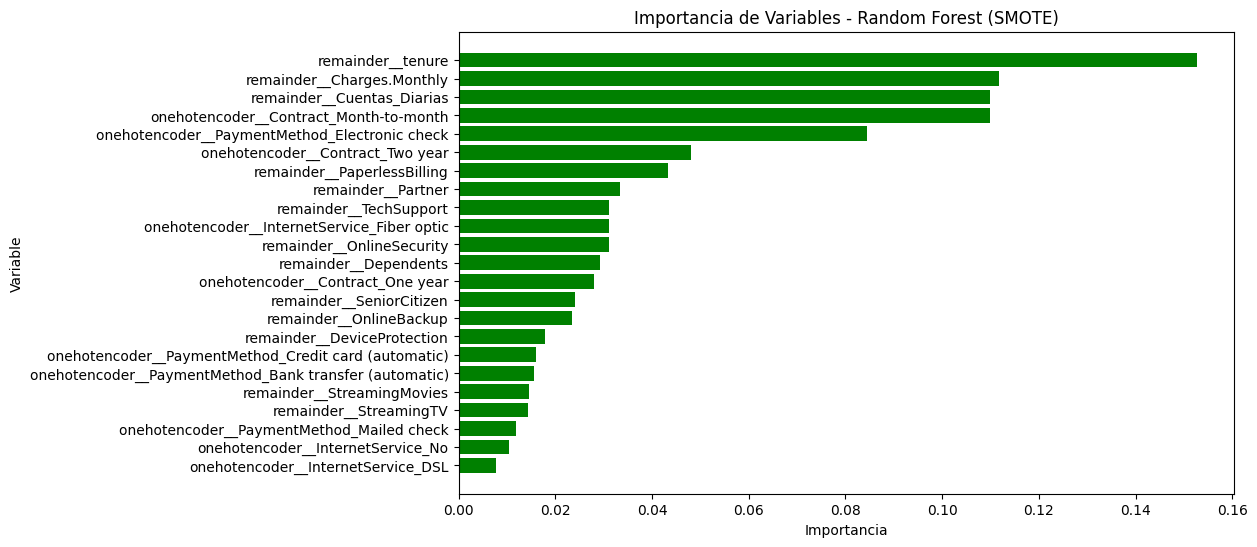

Top variables (Random Forest con SMOTE):
                                         Variable  Importancia
13                              remainder__tenure     0.152623
21                     remainder__Charges.Monthly     0.111858
22                     remainder__Cuentas_Diarias     0.109935
0          onehotencoder__Contract_Month-to-month     0.109880
5   onehotencoder__PaymentMethod_Electronic check     0.084383
2                onehotencoder__Contract_Two year     0.048106
20                    remainder__PaperlessBilling     0.043326
11                             remainder__Partner     0.033407
17                         remainder__TechSupport     0.031134
8      onehotencoder__InternetService_Fiber optic     0.031131


In [99]:
# --- 1. Variables más relevantes - Regresión Logística con SMOTE ---
coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': logreg_smote.coef_[0]
})
coef_df['AbsCoef'] = coef_df['Coeficiente'].abs()
coef_df = coef_df.sort_values(by='AbsCoef', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Variable'], coef_df['Coeficiente'], color=np.where(coef_df['Coeficiente'] > 0, 'red', 'blue'))
plt.axvline(0, color='black', linewidth=0.8)
plt.title('Coeficientes de Regresión Logística (SMOTE)')
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.gca().invert_yaxis()
plt.show()

print("Top variables (Regresión Logística con SMOTE):")
print(coef_df.head(10))


# --- 2. Variables más relevantes - Random Forest con SMOTE ---
importances_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf_smote.feature_importances_
})
importances_df = importances_df.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importances_df['Variable'], importances_df['Importancia'], color='green')
plt.title('Importancia de Variables - Random Forest (SMOTE)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.gca().invert_yaxis()
plt.show()

print("Top variables (Random Forest con SMOTE):")
print(importances_df.head(10))
